In [1]:
from transmorph.datasets import load_pal_10x

# Format: {patient_label -> AnnData}
pal_10x = load_pal_10x()

databank_api > Loading bank pal_10x.
databank_api > Bank pal_10x successfully loaded.


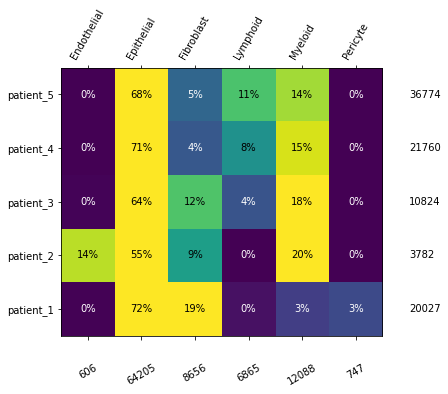

In [3]:
# Displaying cell type distribution across batches

from transmorph.utils.plotting import plot_label_distribution_heatmap

plot_label_distribution_heatmap(pal_10x, label="class_type")

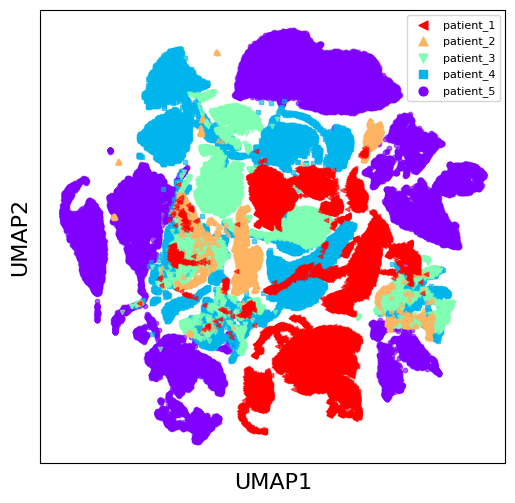

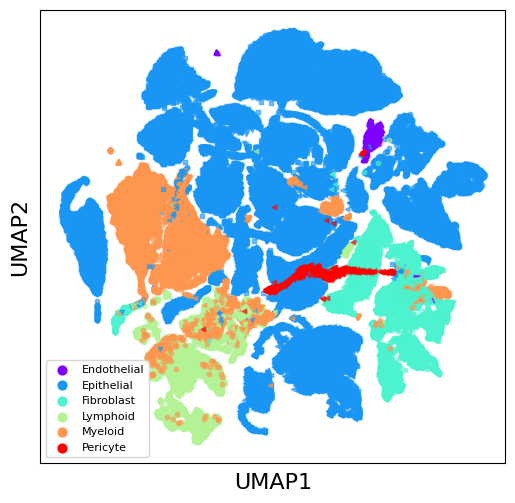

In [5]:
from transmorph.utils.plotting import scatter_plot, reduce_dimension

reduce_dimension(pal_10x, output_obsm="tr_umap")

scatter_plot(
    pal_10x, 
    input_obsm="tr_umap"
)
scatter_plot(
    pal_10x, 
    color_by="class_type", 
    input_obsm="tr_umap"
)

In [6]:
from transmorph.stats.lisi import lisi

datasets = list(pal_10x.values())
lisi_batch_bef = lisi(datasets) # By default, gene representation is used
lisi_class_bef = lisi(datasets, obs="class_type")

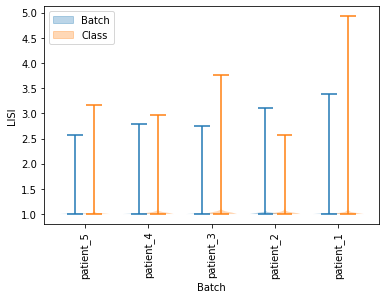

In [7]:
# Plotting LISI as violin plots

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))
    
positions = np.arange(len(datasets))

labels = []
plt.figure(figsize=(6,4))
add_label(plt.violinplot(lisi_batch_bef, positions=positions - .15), "Batch")
add_label(plt.violinplot(lisi_class_bef, positions=positions + .15), "Class")
plt.xticks(positions, pal_10x.keys(), rotation=90)
plt.xlabel("Batch")
plt.ylabel("LISI")

plt.legend(*zip(*labels), loc=2)
pass

In [8]:
from transmorph.models import MNNCorrection

model = MNNCorrection() 
model.transform(pal_10x, reference=pal_10x['patient_4'])

MNN_CORRECTION > Transmorph model is initializing.
MNN_CORRECTION > Ready to start the integration of 5 datasets, 93167 total samples.
MNN_CORRECTION > Running layer LAYER_INPUT#0.
MNN_CORRECTION > Running layer LAYER_TRANSFORMATION#1.
MNN_CORRECTION > Running layer LAYER_TRANSFORMATION#2.
MNN_CORRECTION > Running layer LAYER_MATCHING#3.
LAYER_MATCHING#3 > Calling matching MATCHING_MNN.
MNN_CORRECTION > Running layer LAYER_MERGING#4.
LAYER_MERGING#4 > Running merging MERGING_LINEAR_CORRECTION...
MNN_CORRECTION > Running layer LAYER_OUTPUT#5.
MNN_CORRECTION > Terminated. Total embedding shape: (93167, 3195)
MNN_CORRECTION > Results have been written in AnnData.obsm['X_transmorph'].


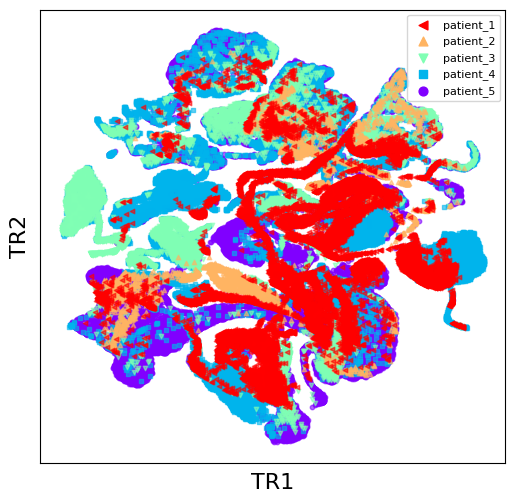

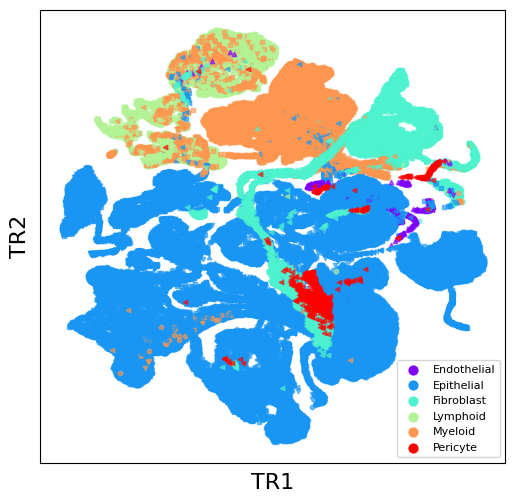

In [10]:
from transmorph.utils.plotting import reduce_dimension, scatter_plot

reduce_dimension(pal_10x, reducer="umap", input_obsm="transmorph")

scatter_plot(pal_10x, xlabel="TR1", ylabel="TR2")
scatter_plot(pal_10x, color_by="class_type", xlabel="TR1", ylabel="TR2")

In [11]:
from transmorph.stats.lisi import lisi

datasets = list(pal_10x.values())
lisi_batch_aft = lisi(datasets, obsm="transmorph")
lisi_class_aft = lisi(datasets, obsm="transmorph", obs="class_type")

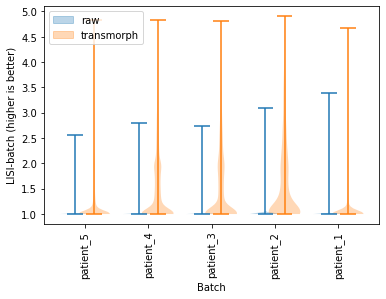

In [12]:
# LISI-batch (higher is better)
labels = []
plt.figure(figsize=(6,4))
add_label(plt.violinplot(lisi_batch_bef, positions=positions - .15), "raw")
add_label(plt.violinplot(lisi_batch_aft, positions=positions + .15), "transmorph")
plt.xticks(positions, pal_10x.keys(), rotation=90)
plt.xlabel("Batch")
plt.ylabel("LISI-batch (higher is better)")

plt.legend(*zip(*labels), loc=2)
pass

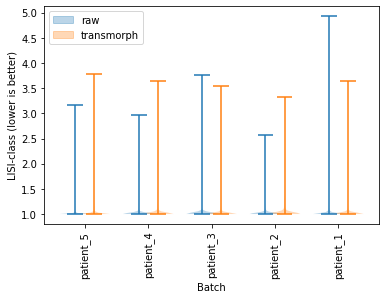

In [13]:
# LISI-class (lower is better)
labels = []
plt.figure(figsize=(6,4))
add_label(plt.violinplot(lisi_class_bef, positions=positions - .15), "raw")
add_label(plt.violinplot(lisi_class_aft, positions=positions + .15), "transmorph")
plt.xticks(positions, pal_10x.keys(), rotation=90)
plt.xlabel("Batch")
plt.ylabel("LISI-class (lower is better)")

plt.legend(*zip(*labels), loc=2)
pass